#LSTM and ARIMA with Bollinger Bands Technical Indicator


**Authors:** Gabriel Sposito and Thomas Frentzel

**LSTM**


In [ ]:
!pip install ta

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dropout, LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from ta.trend import CCIIndicator, MACD
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from ta.trend import PSARIndicator

In [ ]:
base = pd.read_csv('NVDA 5Y.csv')
base.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,$132.89,285722500,$130.26,$133.48,$129.42
1,10/07/2024,$127.72,346250200,$124.99,$130.64,$124.95
2,10/04/2024,$124.92,244465600,$124.94,$125.04,$121.83
3,10/03/2024,$122.85,277118000,$120.92,$124.36,$120.3401
4,10/02/2024,$118.85,221845900,$116.44,$119.38,$115.14


In [ ]:
#Removing nule results
base.dropna()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,$132.89,285722500,$130.26,$133.48,$129.42
1,10/07/2024,$127.72,346250200,$124.99,$130.64,$124.95
2,10/04/2024,$124.92,244465600,$124.94,$125.04,$121.83
3,10/03/2024,$122.85,277118000,$120.92,$124.36,$120.3401
4,10/02/2024,$118.85,221845900,$116.44,$119.38,$115.14
...,...,...,...,...,...,...
1253,10/15/2019,$4.9093,667985200,$4.754,$4.9823,$4.74
1254,10/14/2019,$4.6633,210335760,$4.641,$4.6843,$4.6096
1255,10/11/2019,$4.6498,450866800,$4.6603,$4.7335,$4.6413
1256,10/10/2019,$4.5758,327515560,$4.5155,$4.627,$4.5103


In [ ]:
# Removing $
base['Close/Last'] = base['Close/Last'].str.replace('$', '')
base['Open'] = base['Open'].str.replace('$', '')
base['High'] = base['High'].str.replace('$', '')
base['Low'] = base['Low'].str.replace('$', '')

# Converting str to float
base['Close/Last'] = base['Close/Last'].astype(float)
base['Open'] = base['Open'].astype(float)
base['High'] = base['High'].astype(float)
base['Low'] = base['Low'].astype(float)

In [ ]:
cci = CCIIndicator(high=base['High'], low=base['Low'], close=base['Close/Last'], window=20, constant=0.015)
base['CCI'] = cci.cci()

sma_tp = base['High'] + base['Low'] + base['Close/Last'] / 3
sma_tp = sma_tp.rolling(window=20).mean()
mean_deviation = np.mean(np.abs(base['Close/Last'] - sma_tp))

rsi = RSIIndicator(close=base['Close/Last'], window=14)
base['RSI'] = rsi.rsi()

macd = MACD(close=base['Close/Last'], window_slow=26, window_fast=12, window_sign=9)
base['MACD'] = macd.macd()
base['MACD_Signal'] = macd.macd_signal()
base['MACD_Diff'] = macd.macd_diff()

psar = PSARIndicator(high=base['High'], low=base['Low'], close=base['Close/Last'])
base['Parabolic_SAR'] = psar.psar()

bollinger = BollingerBands(close=base['Close/Last'], window=20, window_dev=2)
base['Bollinger_High'] = bollinger.bollinger_hband()
base['Bollinger_Low'] = bollinger.bollinger_lband()
base['Bollinger_Middle'] = bollinger.bollinger_mavg()
base['Bollinger_Width'] = bollinger.bollinger_wband()

base.dropna()

,Date,Close/Last,Volume,Open,High,Low,CCI,RSI,MACD,MACD_Signal,MACD_Diff,Parabolic_SAR,Bollinger_High,Bollinger_Low,Bollinger_Middle,Bollinger_Width
33,08/21/2024,128.5000,257883600,127.3150,129.3500,126.6600,109.563550,59.206678,1.479949,-0.959813,2.439762,115.264796,133.280229,100.584771,116.932500,27.960967
34,08/20/2024,127.2500,300087400,128.4000,129.8800,125.8900,93.439821,57.552758,1.795072,-0.408836,2.203908,117.184220,134.480982,100.772018,117.626500,28.657628
35,08/19/2024,130.0000,318333600,124.2800,130.0000,123.4200,85.454132,60.187685,2.240879,0.121107,2.119773,118.873314,136.004529,100.689471,118.347000,29.840264
36,08/16/2024,124.5800,302589900,121.9400,125.0000,121.1800,43.621331,53.180795,2.132257,0.523337,1.608920,120.359716,136.582416,100.891584,118.737000,30.058729
37,08/15/2024,122.8600,318086700,118.7600,123.2400,117.4700,20.947193,51.145899,1.885647,0.795799,1.089848,131.260000,136.860746,100.989254,118.925000,30.163121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,10/15/2019,4.9093,667985200,4.7540,4.9823,4.7400,-81.288448,39.738294,-0.131057,-0.128466,-0.002591,4.993934,5.343533,4.736087,5.039810,12.052969
1254,10/14/2019,4.6633,210335760,4.6410,4.6843,4.6096,-167.078542,30.794457,-0.143643,-0.131501,-0.012142,4.980500,5.347782,4.677718,5.012750,13.367186
1255,10/11/2019,4.6498,450866800,4.6603,4.7335,4.6413,-137.142137,30.390224,-0.152944,-0.135790,-0.017154,4.982300,5.344708,4.626322,4.985515,14.409444
1256,10/10/2019,4.5758,327515560,4.5155,4.6270,4.5103,-162.944078,28.204663,-0.164391,-0.141510,-0.022881,4.937576,5.339425,4.568335,4.953880,15.565376


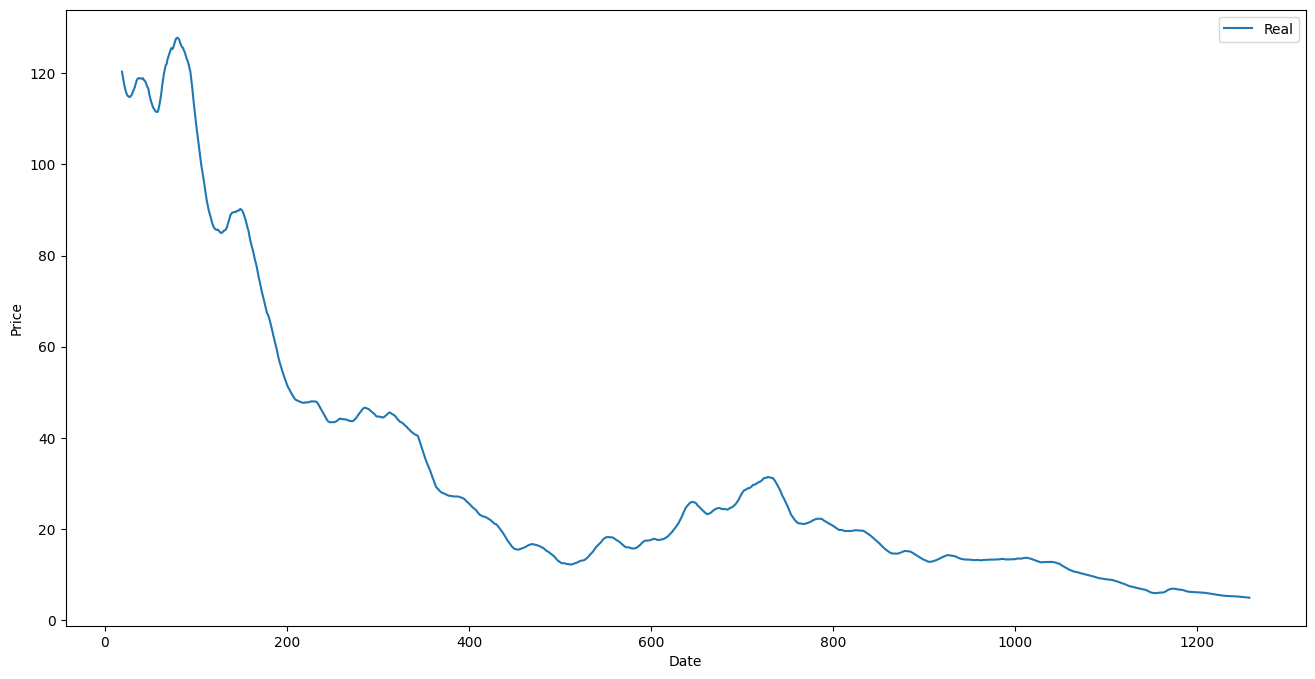

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(base['Bollinger_Middle'], label='Real')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

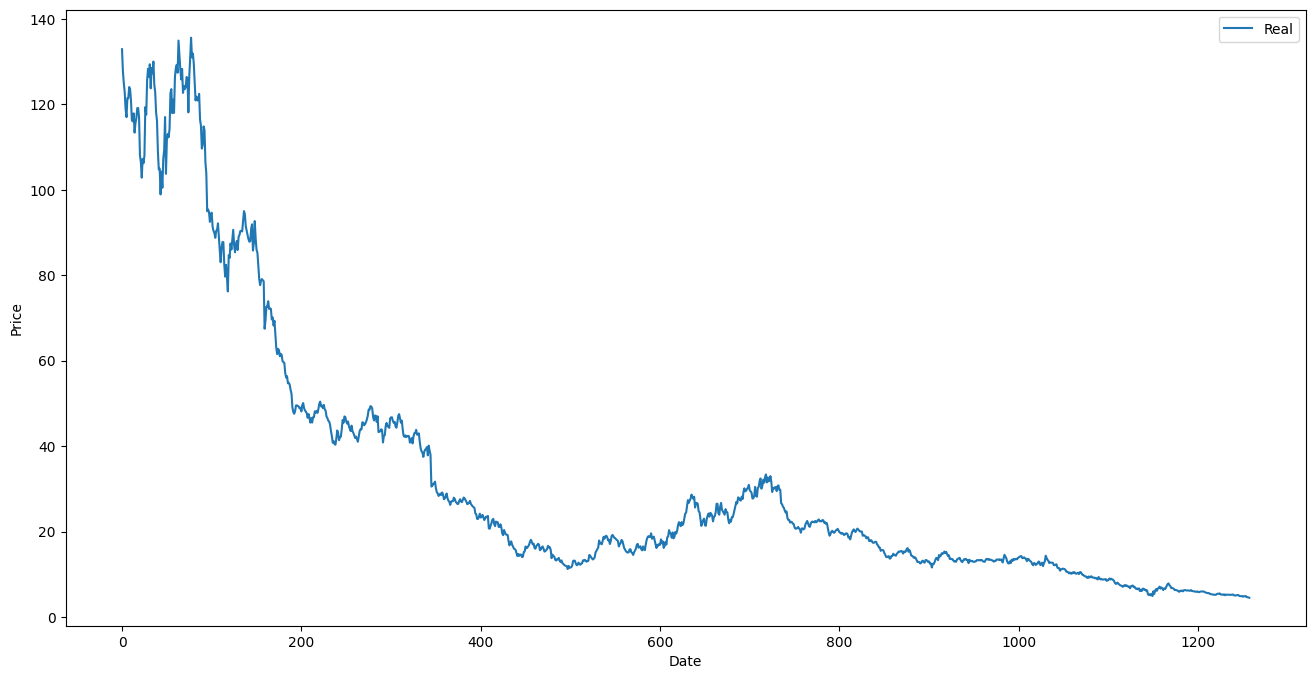

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(base['Close/Last'], label='Real')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [ ]:
# Converting indicator values ​​to numeric values ​​and removing NaN values
base = base.replace([np.inf, -np.inf], np.nan)
base = base.dropna()

In [ ]:
# Normalizing the data of real values
scaler_real_value = MinMaxScaler(feature_range=(0, 1))
scaled_data_real_value = scaler_real_value.fit_transform(np.array(base['Close/Last']).reshape(-1, 1))

In [ ]:
window_size_real_value = 10
forecasters_real_value = []
real_value_of_prices = []
for i in range(window_size_real_value, len(base)):
    forecasters_real_value.append(scaled_data_real_value[i - window_size_real_value:i, 0])
    real_value_of_prices.append(scaled_data_real_value[i, 0])

forecasters_real_value, real_value_of_prices = np.array(forecasters_real_value), np.array(real_value_of_prices)
forecasters_real_value = np.reshape(forecasters_real_value, (forecasters_real_value.shape[0], forecasters_real_value.shape[1], 1))

In [ ]:
#dividindo a coluna close/last em 70% treino e 30% teste com trai_test_split
Xtrain_real_lstm, Xtest_real_lstm, ytrain_real_lstm, ytest_real_lstm = train_test_split(forecasters_real_value, real_value_of_prices,
                                                                                        test_size = 0.3, shuffle = False)

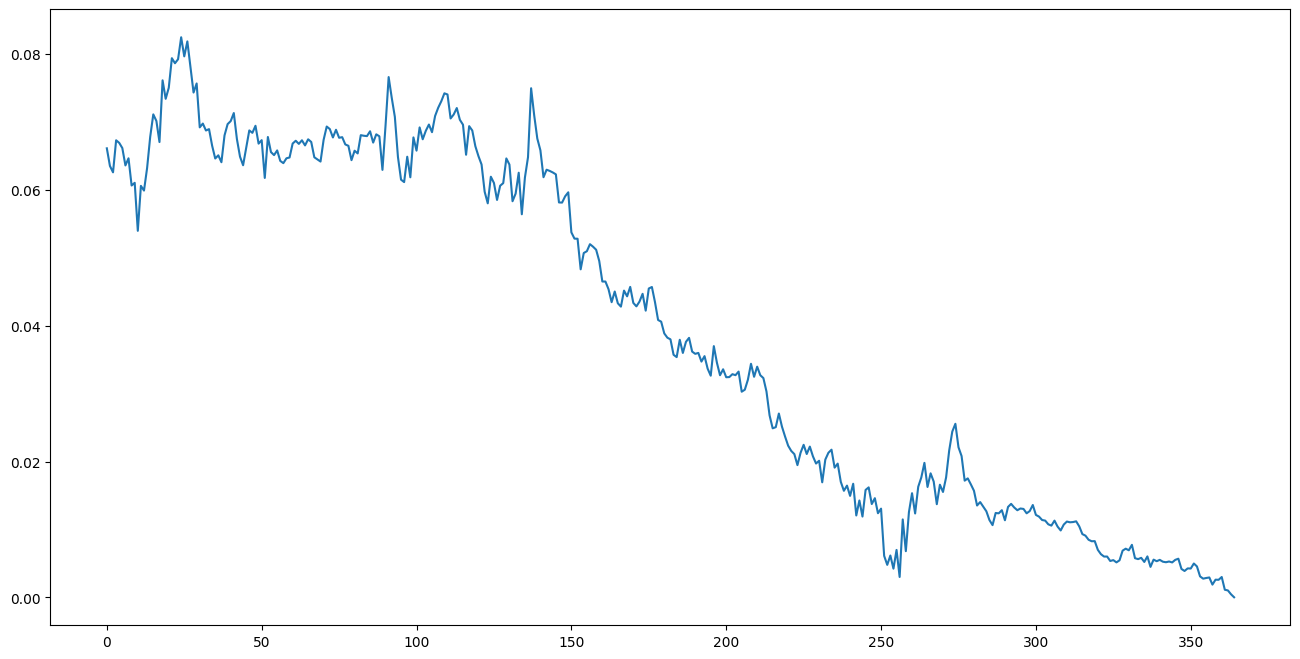

In [ ]:
#plotando grafico dos valores de teste
plt.figure(figsize=(16,8))
plt.plot(ytest_real_lstm)
plt.show()

In [ ]:
# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(base['Bollinger_Middle']).reshape(-1, 1))

In [ ]:
window_size = 10
forecasters = []
real_value = []
for i in range(window_size, len(base)):
    forecasters.append(scaled_data[i - window_size:i, 0])
    real_value.append(scaled_data[i, 0])

forecasters, real_value = np.array(forecasters), np.array(real_value)
forecasters = np.reshape(forecasters, (forecasters.shape[0], forecasters.shape[1], 1))

In [ ]:
# Separating data between training and testing
X_train, X_test, y_train, y_test = train_test_split(forecasters, real_value, test_size=0.3, shuffle=False)

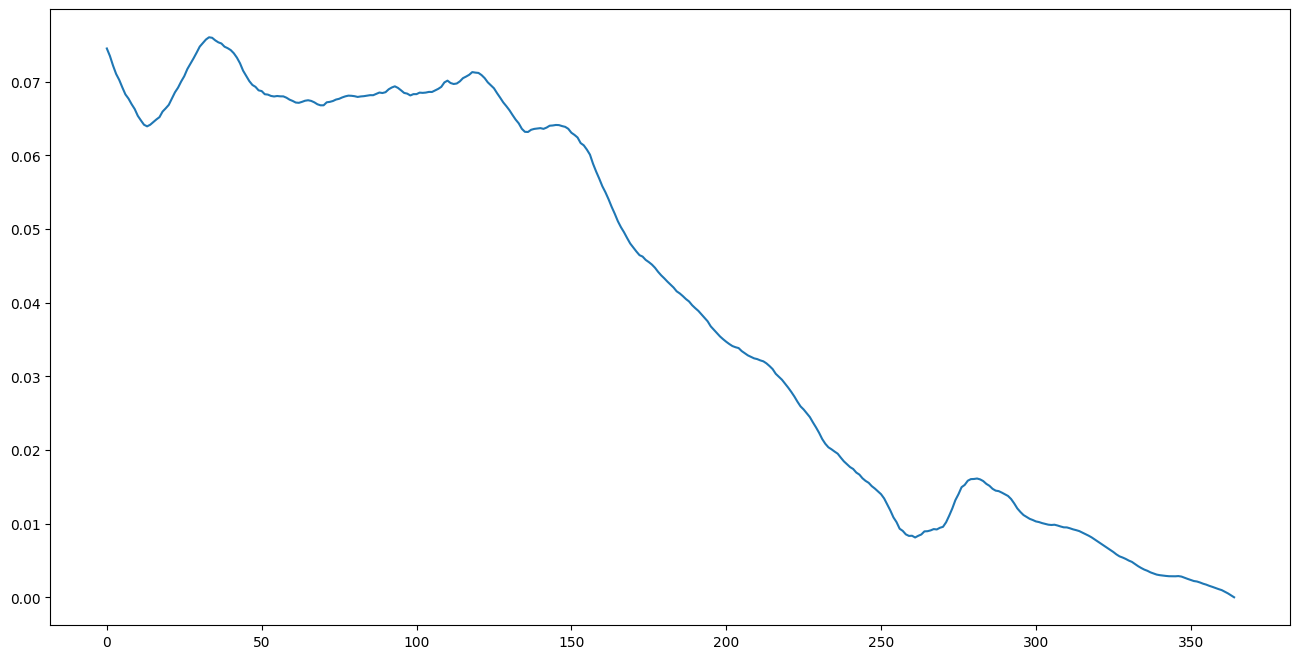

In [ ]:
# Showing test set in graph
plt.figure(figsize=(16, 8))
plt.plot(y_test)
plt.show()

In [ ]:
# LSTM model

lstm = Sequential()
lstm.add(LSTM(units=50, return_sequences=True, input_shape=(forecasters.shape[1], 1)))
lstm.add(Dropout(0.3))
lstm.add(LSTM(units=50, return_sequences=True))
lstm.add(Dropout(0.3))
lstm.add(LSTM(units=50))
lstm.add(Dropout(0.3))
lstm.add(Dense(units=1))
lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0692 - mean_absolute_error: 0.1700 - val_loss: 7.9307e-04 - val_mean_absolute_error: 0.0268
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0045 - mean_absolute_error: 0.0412 - val_loss: 8.6301e-04 - val_mean_absolute_error: 0.0287
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0034 - mean_absolute_error: 0.0340 - val_loss: 2.0207e-04 - val_mean_absolute_error: 0.0127
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0025 - mean_absolute_error: 0.0317 - val_loss: 8.9810e-05 - val_mean_absolute_error: 0.0083
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0029 - mean_absolute_error: 0.0313 - val_loss: 1.0421e-04 - val_mean_absolute_error: 0.0090
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0030 - mean_absolute_error: 0.0308 - val_loss: 7.4219e-05 - val_mean_absolute_error: 0.0079
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0022 - mean_ab

In [ ]:
test_predictions = lstm.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [ ]:
# Transforming test values ​​back to original values
y_orig_test = scaler.inverse_transform(y_test.reshape(-1, 1))

#escalonando valores de teste
ytest_real_lstm = scaler_real_value.inverse_transform(ytest_real_lstm.reshape(-1, 1))

In [ ]:
test_predictions = test_predictions.ravel()  # Converts to 1D
y_orig_test = y_orig_test.ravel()
ytest_real_lstm = ytest_real_lstm.ravel()

In [ ]:
print(test_predictions.shape)
print(y_orig_test.shape)

(365,)
(365,)


In [ ]:
test_size_L = len(y_test)

close_test_L = base['Close/Last'].tail(test_size_L)

In [ ]:
# Inverse Bollinger Bands formula
def Bandas_Bollinger_Middle_inverse(bollinger_values_L, close_values_L, window=20):
    original_prices = []

    for i in range(len(bollinger_values_L)):
        if i < window:
            # For the first values, where there is not enough data to calculate the SMA, we keep the original closing value
            original_prices.append(close_values_L[i])
            continue

       # Calculates the simple moving average (SMA) of the last 'window' periods
        middle_ma = np.mean(close_values_L[i-window:i])

        # Using the ratio between the predicted middle band value and the actual SMA value assuming that the middle band value (bollinger_values_L[i]) represents an estimate of the SMA
        estimated_price = bollinger_values_L[i] + (close_values_L[i] - middle_ma)

        original_prices.append(estimated_price)

    return np.array(original_prices)

# Making sure the data is in array format
close_test_L = close_test_L.values if isinstance(close_test_L, pd.Series) else close_test_L

In [ ]:
# Inverting the values ​​test_predictions and y_orig_teste by the inverse Parabolic SAR formula
test_predictions_inverted = Bandas_Bollinger_Middle_inverse(test_predictions, close_test_L)
y_orig_test_inverted = Bandas_Bollinger_Middle_inverse(y_orig_test, close_test_L)

min_length = min(len(ytest_real_lstm), len(test_predictions_inverted))
ytest_real_lstm = ytest_real_lstm[:min_length]
test_predictions_inverted = test_predictions_inverted[:min_length]

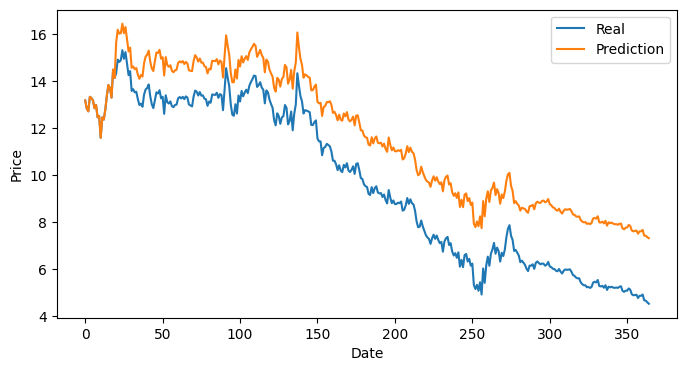

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(ytest_real_lstm)), ytest_real_lstm, label='Real')
plt.plot(range(len(test_predictions_inverted)), test_predictions_inverted, label='Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# R2 Score
r2 = r2_score(ytest_real_lstm, test_predictions_inverted)
print(f'R2 Score: {r2}')

# RMSE
rmse = np.sqrt(np.mean((ytest_real_lstm - test_predictions_inverted) ** 2))
print(f'RMSE: {rmse}')

R2 Score: 0.6218151252929374
RMSE: 2.0701207372107935


**ARIMA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from ta.trend import CCIIndicator, MACD
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from ta.trend import PSARIndicator
from math import sqrt

In [ ]:
base_A = pd.read_csv('NVDA 5Y.csv')
base_A.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2024,$132.89,285722500,$130.26,$133.48,$129.42
1,10/07/2024,$127.72,346250200,$124.99,$130.64,$124.95
2,10/04/2024,$124.92,244465600,$124.94,$125.04,$121.83
3,10/03/2024,$122.85,277118000,$120.92,$124.36,$120.3401
4,10/02/2024,$118.85,221845900,$116.44,$119.38,$115.14


In [ ]:
base_A.dtypes

,0
Date,object
Close/Last,object
Volume,int64
Open,object
High,object
Low,object


In [ ]:
# Removing $
base_A['Close/Last'] = base_A['Close/Last'].str.replace('$', '')
base_A['Open'] = base_A['Open'].str.replace('$', '')
base_A['High'] = base_A['High'].str.replace('$', '')
base_A['Low'] = base_A['Low'].str.replace('$', '')

# Converting str to float
base_A['Close/Last'] = base_A['Close/Last'].astype(float)
base_A['Open'] = base_A['Open'].astype(float)
base_A['High'] = base_A['High'].astype(float)
base_A['Low'] = base_A['Low'].astype(float)

In [ ]:
cci = CCIIndicator(high=base_A['High'], low=base_A['Low'], close=base_A['Close/Last'], window=20, constant=0.015)
base_A['CCI'] = cci.cci()

sma_tp = base_A['High'] + base_A['Low'] + base_A['Close/Last'] / 3
sma_tp = sma_tp.rolling(window=20).mean()
mean_deviation = np.mean(np.abs(base_A['Close/Last'] - sma_tp))

rsi = RSIIndicator(close=base_A['Close/Last'], window=14)
base_A['RSI'] = rsi.rsi()

macd = MACD(close=base_A['Close/Last'], window_slow=26, window_fast=12, window_sign=9)
base_A['MACD'] = macd.macd()
base_A['MACD_Signal'] = macd.macd_signal()
base_A['MACD_Diff'] = macd.macd_diff()

psar = PSARIndicator(high=base_A['High'], low=base_A['Low'], close=base_A['Close/Last'])
base_A['Parabolic_SAR'] = psar.psar()

bollinger = BollingerBands(close=base_A['Close/Last'], window=20, window_dev=2)
base_A['Bollinger_High'] = bollinger.bollinger_hband()
base_A['Bollinger_Low'] = bollinger.bollinger_lband()
base_A['Bollinger_Middle'] = bollinger.bollinger_mavg()
base_A['Bollinger_Width'] = bollinger.bollinger_wband()

base_A.dropna()

,Date,Close/Last,Volume,Open,High,Low,CCI,RSI,MACD,MACD_Signal,MACD_Diff,Parabolic_SAR,Bollinger_High,Bollinger_Low,Bollinger_Middle,Bollinger_Width
33,08/21/2024,128.5000,257883600,127.3150,129.3500,126.6600,109.563550,59.206678,1.479949,-0.959813,2.439762,115.264796,133.280229,100.584771,116.932500,27.960967
34,08/20/2024,127.2500,300087400,128.4000,129.8800,125.8900,93.439821,57.552758,1.795072,-0.408836,2.203908,117.184220,134.480982,100.772018,117.626500,28.657628
35,08/19/2024,130.0000,318333600,124.2800,130.0000,123.4200,85.454132,60.187685,2.240879,0.121107,2.119773,118.873314,136.004529,100.689471,118.347000,29.840264
36,08/16/2024,124.5800,302589900,121.9400,125.0000,121.1800,43.621331,53.180795,2.132257,0.523337,1.608920,120.359716,136.582416,100.891584,118.737000,30.058729
37,08/15/2024,122.8600,318086700,118.7600,123.2400,117.4700,20.947193,51.145899,1.885647,0.795799,1.089848,131.260000,136.860746,100.989254,118.925000,30.163121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,10/15/2019,4.9093,667985200,4.7540,4.9823,4.7400,-81.288448,39.738294,-0.131057,-0.128466,-0.002591,4.993934,5.343533,4.736087,5.039810,12.052969
1254,10/14/2019,4.6633,210335760,4.6410,4.6843,4.6096,-167.078542,30.794457,-0.143643,-0.131501,-0.012142,4.980500,5.347782,4.677718,5.012750,13.367186
1255,10/11/2019,4.6498,450866800,4.6603,4.7335,4.6413,-137.142137,30.390224,-0.152944,-0.135790,-0.017154,4.982300,5.344708,4.626322,4.985515,14.409444
1256,10/10/2019,4.5758,327515560,4.5155,4.6270,4.5103,-162.944078,28.204663,-0.164391,-0.141510,-0.022881,4.937576,5.339425,4.568335,4.953880,15.565376


In [ ]:
# Converting indicator values ​​to numeric values ​​and removing NaN values
base_A = base_A.replace([np.inf, -np.inf], np.nan)
base_A = base_A.dropna()

In [ ]:
base_A.head()

,Date,Close/Last,Volume,Open,High,Low,CCI,RSI,MACD,MACD_Signal,MACD_Diff,Parabolic_SAR,Bollinger_High,Bollinger_Low,Bollinger_Middle,Bollinger_Width
33,08/21/2024,128.50,257883600,127.315,129.35,126.66,109.563550,59.206678,1.479949,-0.959813,2.439762,115.264796,133.280229,100.584771,116.9325,27.960967
34,08/20/2024,127.25,300087400,128.400,129.88,125.89,93.439821,57.552758,1.795072,-0.408836,2.203908,117.184220,134.480982,100.772018,117.6265,28.657628
35,08/19/2024,130.00,318333600,124.280,130.00,123.42,85.454132,60.187685,2.240879,0.121107,2.119773,118.873314,136.004529,100.689471,118.3470,29.840264
36,08/16/2024,124.58,302589900,121.940,125.00,121.18,43.621331,53.180795,2.132257,0.523337,1.608920,120.359716,136.582416,100.891584,118.7370,30.058729
37,08/15/2024,122.86,318086700,118.760,123.24,117.47,20.947193,51.145899,1.885647,0.795799,1.089848,131.260000,136.860746,100.989254,118.9250,30.163121


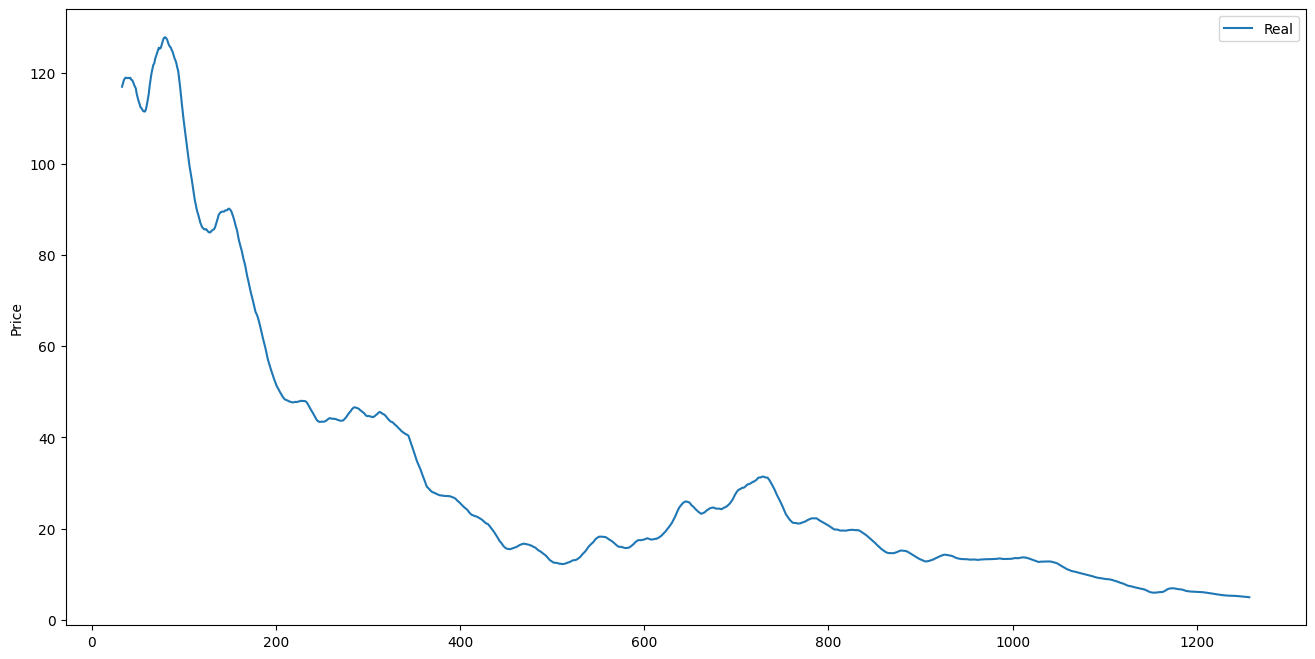

In [ ]:
# Plotting Bollinger Bands
plt.figure(figsize=(16,8))
plt.plot(base_A['Bollinger_Middle'], label='Real')
plt.ylabel('Price')
plt.legend()

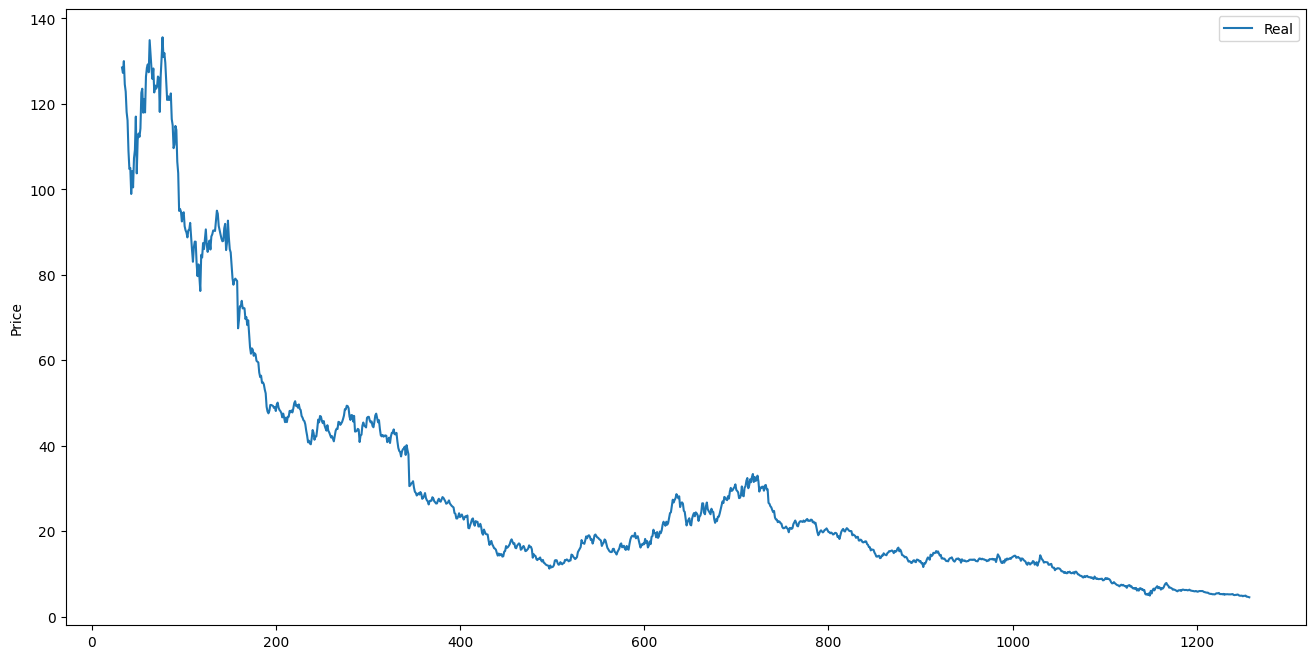

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(base_A['Close/Last'], label='Real')
plt.ylabel('Price')
plt.legend()

In [ ]:
X_R = base_A['Close/Last'].values
size_R = int(len(X_R) * 0.70)
train_R, test_R = X_R[0:size_R], X_R[size_R:len(X_R)]
history_R = [x_r for x_r in train_R]
forecasts_R = list()

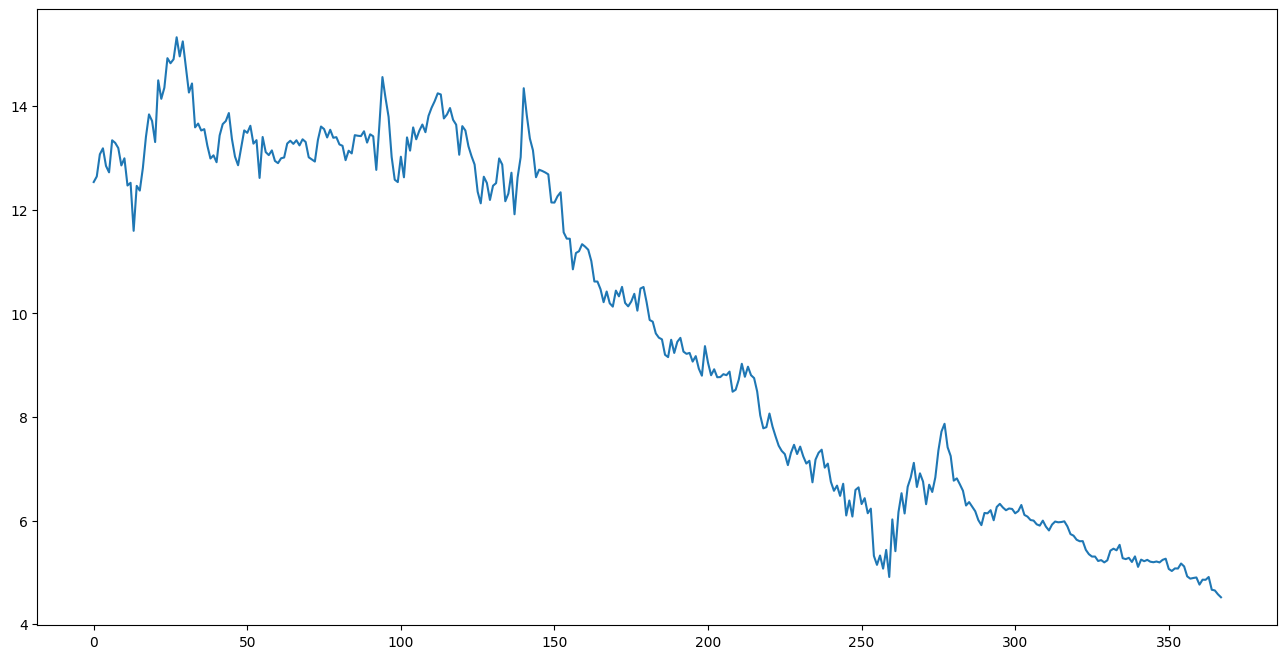

In [ ]:
#Test Grafic
plt.figure(figsize=(16, 8))
plt.plot(test_R)
plt.show()

In [ ]:
# Addfuller for Bollinger Bands Middle
result = adfuller(base_A['Bollinger_Middle'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -3.4513788100303397
p-value: 0.009327199519562505


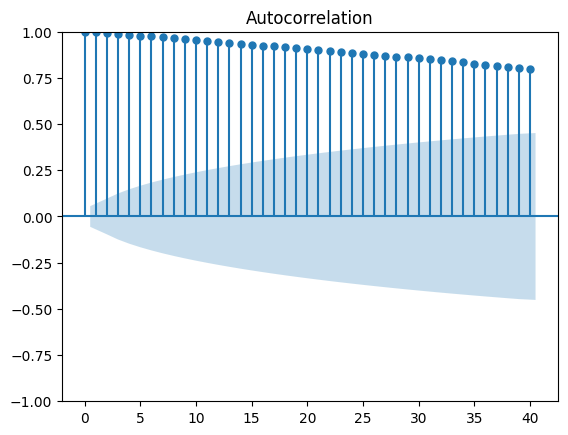

In [ ]:
plot_acf(base_A['Bollinger_Middle'], lags=40)
plt.show()

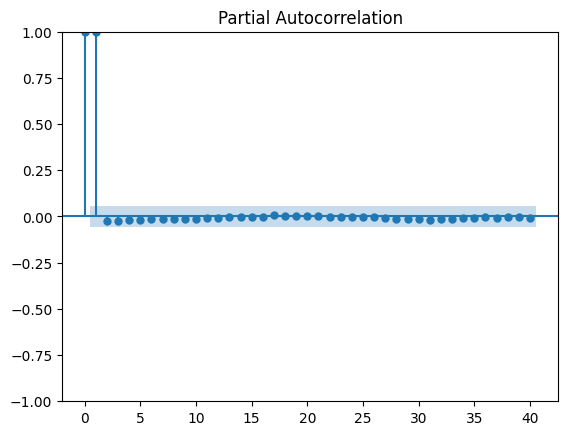

In [ ]:
plot_pacf(base_A['Bollinger_Middle'], lags=40)
plt.show()

In [ ]:
X = base_A['Bollinger_Middle'].values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
forecasts = list()

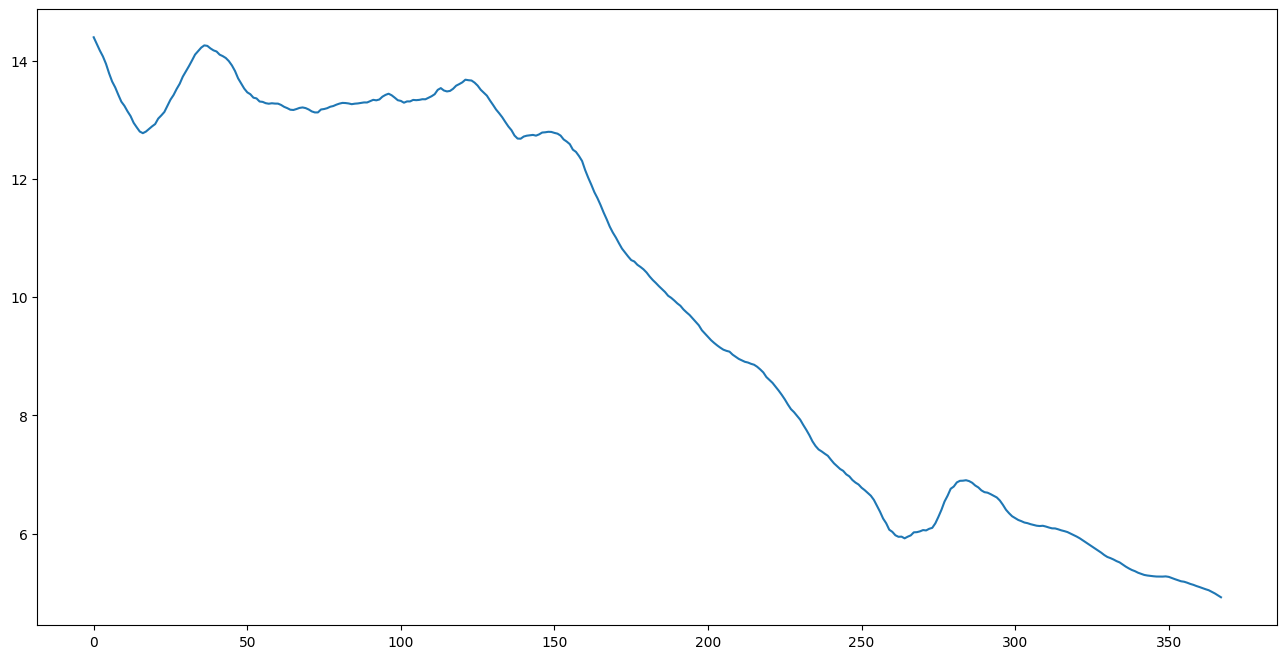

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(test)
plt.show()

In [ ]:
# ARIMA
for t in range(len(test)):
    model = ARIMA(history, order=(2, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    forecasts.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Expected={yhat}, Observed={obs}')

Expected=14.41187006998645, Observed=14.401175
Expected=14.270432197722503, Observed=14.290809999999999
Expected=14.182151976307654, Observed=14.176325
Expected=14.069163155976153, Observed=14.077074999999999
Expected=13.978474377166807, Observed=13.951274999999999
Expected=13.836154019720574, Observed=13.791775000000001
Expected=13.63871901275911, Observed=13.651974999999998
Expected=13.515993708122155, Observed=13.552690000000002
Expected=13.454552602249022, Observed=13.42828
Expected=13.313958163927758, Observed=13.31063
Expected=13.19361084047223, Observed=13.240305000000001
Expected=13.170778614107432, Observed=13.147870000000001
Expected=13.063239776711494, Observed=13.06671
Expected=12.984846552469124, Observed=12.953299999999999
Expected=12.851076224607832, Observed=12.876999999999999
Expected=12.795152838042128, Observed=12.804925
Expected=12.741640929972604, Observed=12.777750000000001
Expected=12.742612254770899, Observed=12.804475
Expected=12.830718901046241, Observed=12.84

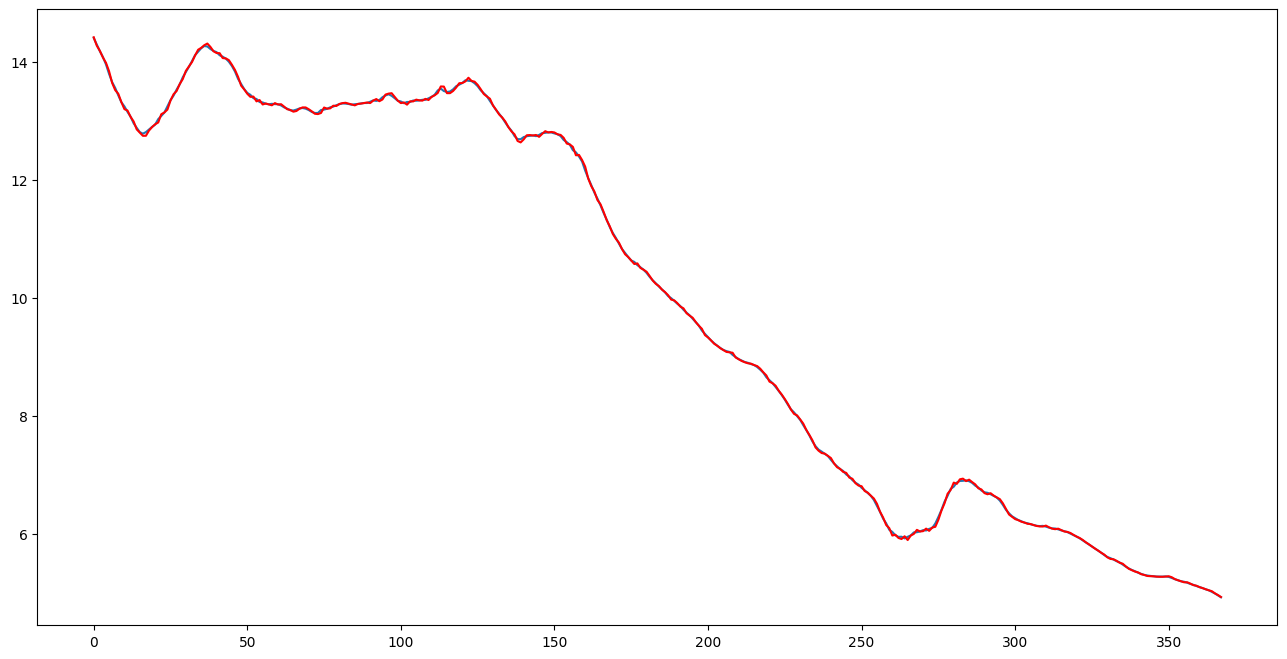

In [ ]:
# Test and forecast set
plt.figure(figsize=(16, 8))
plt.plot(test)
plt.plot(forecasts, color='red')
plt.show()

In [ ]:
# Ensuring that data is one-dimensional
test = test.ravel()
forecasts = np.array(forecasts).ravel()

In [ ]:
# Getting the high, low and close values ​​from the test set for Bollinger Bands
test_size_A = len(test)

close_test_A = base_A['Close/Last'].tail(test_size_A)

In [ ]:
print(test.shape)
print(forecasts.shape)

(368,)
(368,)


In [ ]:
# Inverse Bollinger Bands Formula
def Bandas_Bollinger_Middle_inverse(bollinger_values_A, close_values_A, window=20):
    original_prices = []

    for i in range(len(bollinger_values_A)):
        if i < window:
            # For the first values, where there is not enough data to calculate the SMA, we keep the original closing value
            original_prices.append(close_values_A[i])
            continue

        # Calculates the simple moving average (SMA) of the last 'window' periods
        middle_ma = np.mean(close_values_A[i-window:i])

        # Using the ratio between the predicted middle band value and the actual SMA value assuming that the middle band value (bollinger_values_L[i]) represents an estimate of the SMA
        estimated_price = bollinger_values_A[i] + (close_values_A[i] - middle_ma)

        original_prices.append(estimated_price)

    return np.array(original_prices)

# Making sure the data is in array format
close_test_A = close_test_A.values if isinstance(close_test_A, pd.Series) else close_test_A

In [ ]:
test_inverted = Bandas_Bollinger_Middle_inverse(test, close_test_A)
forecasts_inverted = Bandas_Bollinger_Middle_inverse(forecasts, close_test_A)

min_length_R = min(len(test_R), len(forecasts_inverted))
test_R = test_R[:min_length_R]
forecasts_inverted = forecasts_inverted[:min_length_R]

In [ ]:
# RMSE
rmse = sqrt(mean_squared_error(test_R, forecasts_inverted))
print(f'RMSE: {rmse}')

# R2 Score
r2 = r2_score(test_R, forecasts_inverted)
print(f'R2 Score: {r2}')

RMSE: 0.04886805441184488
R2 Score: 0.9997889466307326


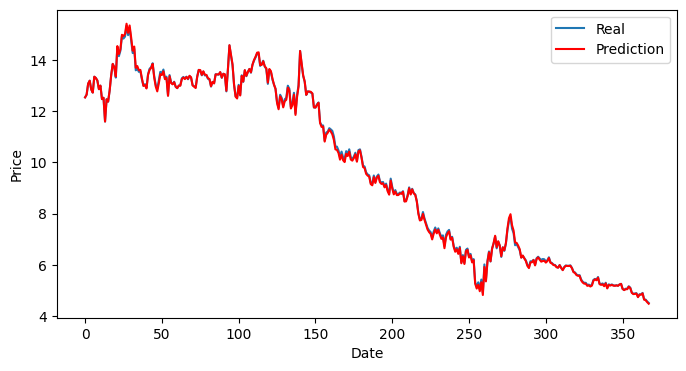

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(test_R)), test_R, label='Real')
plt.plot(range(len(forecasts_inverted)), forecasts_inverted, label='Prediction', color = 'red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()